In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats


#### Задача 1

О непрерывной равномерно распределённой случайной величине B известно, что её дисперсия равна 0.2. Можно ли найти правую границу величины B и её среднее значение зная, что левая граница равна 0.5? Если да, найдите их.
#### Решение

In [69]:
a = 0.5
Dx = 0.2


Формула дисперсии и математического ожидания:$$D(X) = \frac{(b - a)^2}{12}, \:\: M(X) = \dfrac{a + b}{2}$$

отсюда
$$b = \sqrt{12 D(x)} + a$$

In [70]:
b = (12*Dx)**0.5 + a
b

2.049193338482967

In [71]:
#среднее значение будет соответствовать математическому ожиданию
Mx = (a+b)/2
Mx

1.2745966692414834

In [72]:
samples = np.random.uniform(a, b, size=1000)
print(samples)

[0.71014714 1.90417755 1.91039129 1.65461538 0.71303276 0.79314127
 0.57886267 1.82628198 1.17600539 1.52072167 1.4123953  1.35129172
 0.74706573 1.59982621 1.55160946 1.61548795 1.68447069 1.65839232
 0.9150187  1.34422302 1.19308776 1.49127573 0.55683318 1.61212088
 1.52939021 0.82876298 2.04378415 1.83122188 0.9113808  1.37055022
 1.42591196 1.88101926 1.09502019 0.90738809 0.9714289  1.25566657
 1.88924501 1.65853076 1.55163417 1.7015506  1.96817815 0.67747359
 1.01193346 1.89445568 0.90088429 1.29919102 0.52723276 1.69949092
 1.99690853 1.38815676 0.86963368 1.33565399 0.57222212 1.28064471
 1.83279669 1.07857867 1.11995535 0.5556631  1.03845529 1.20507889
 1.47978941 1.27235999 0.83890184 0.76261069 0.7367322  1.15639616
 0.66051856 0.97638969 1.599279   0.97819053 1.17755365 1.02172646
 1.09125496 1.97756262 1.56258975 1.263398   0.89115965 2.01150239
 1.45293833 0.85480173 0.79643376 1.20487904 0.9768941  2.04620136
 0.76864415 1.04694745 1.55839096 1.04235359 1.21811626 1.8940

In [73]:
#математическое ожидание через numpy
samples.mean()

1.271014094257447

In [74]:
#выборочная дисперсия (несмещённая) от выборки через numpy:
samples.var(ddof=1)

0.2002281861190415

### Дополнительно на закрепление:

In [75]:
def edf(samples, x: float) -> float:
    """Эмпирическая функция распределения (empirical distribution
    function).
    """
    
    return samples[samples < x].shape[0] / samples.shape[0]

In [76]:
def pdf_uniform(a: float, b: float, x: float) -> float:
    """Функция плотности (probability density function)
    для равномерного распределения.
    """
    
    return 1 / (b - a) if a <= x <= b else 0

In [77]:
def cdf_uniform(a: float, b: float, x: float) -> float:
    """Функция распределения (cumulative distribution function)
    для равномерного распределения.
    """
    
    if x < a:
        return 0
    if x > b:
        return 1
    else:
        return (x - a) / (b - a)

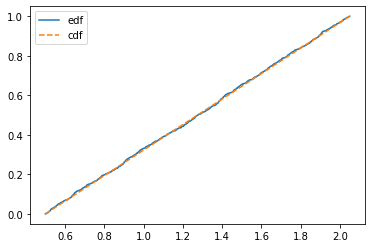

In [78]:
#Построим эмпирическую и теоретическую функции распределения
ox = np.linspace(a, b, 1000)
oy1 = np.array([edf(samples=samples, x=x) for x in ox])
oy2 = np.array([cdf_uniform(a=a, b=b, x=x) for x in ox])

plt.plot(ox, oy1, label='edf')
plt.plot(ox, oy2, linestyle='dashed', label='cdf')

plt.legend()

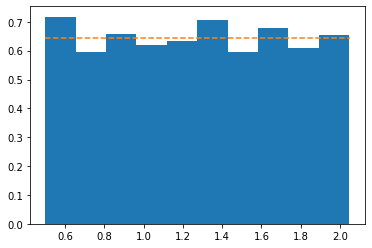

In [79]:
#построим гистограмму, чтобы визуализировать функцию плотности. Вместе с ней построим теоретическую функцию плотности.
oy = np.array([pdf_uniform(a, b, x) for x in ox])

plt.hist(samples, density=True)
plt.plot(ox, oy, linestyle='dashed')

### Задача 2

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.
### Решение

воспользуемся встроенной функцией пакета stats -- stats.norm.cdf
функция принимает следующие аргументы: The location (loc) keyword specifies the mean (среднее по выборке). The scale (scale) keyword specifies the standard deviation (стандартное отклонение).

In [80]:
#среднее квадратическое отклонение массы коробки
for scale in np.linspace(0.00001, 1, 99999):
    s = stats.norm.cdf(x=1, loc=1.06, scale=scale)
    if s > 0.0499 and s < 0.0501:
        print(f'Среднее квадратическое отклонение массы коробки: {scale}')
        break

Среднее квадратическое отклонение массы коробки: 0.03646036450729015


In [81]:
#процент коробок, имеющих массу больше 1.1 кг:
# P(1.1 < X < +inf) -- будет равен разности значений P
# для вычисления слагаемых в разности воспользуемся той же функцией norm.cdf

p = (stats.norm.cdf(x=float('inf'), loc=1.06, scale=scale) - stats.norm.cdf(x=1.1, loc=1.06, scale=scale))
print(f'Процент коробок, имеющих массу больше 1.1 кг: {round(p*100,3)} %')

Процент коробок, имеющих массу больше 1.1 кг: 13.63 %


### Задача 3

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.
#### Решение

для расчета Мат ожидания и Дисперсии воспользуемся формулами 
$$D(X) = \frac{(b - a)^2}{12}, \:\: M(X) = \dfrac{a + b}{2}$$

согласно формулам центральной предельной теоремы <br>
$$𝑎=𝑛⋅𝑀(𝑋), \:\: \sigma^2 = 𝑛⋅𝐷(𝑋)$$

пусть $$Mn = a, \:\: Dn = \sigma^2, \:\: scale\_  = \sigma $$

In [82]:
a = 12
b = 14
n = 30
Mn = ((a + b) / 2)*n
Dn = (((b - a) ** 2) / 12)*n
#теперь найдем квадратичное отклонение
scale_ = Dn**0.5

решение будет похоже на пример выше в плане вычисления вероятностей -- мы воспользуемся функцией stats.norm.cdf;

In [83]:
#а) меньше 390 граммов: P(-inf < X < 390)
pa = stats.norm.cdf(x=390, loc=Mn, scale=scale_) - stats.norm.cdf(x=float('-inf'), loc=Mn, scale=scale_)
print(f'Вероятность, что масса всей коробки будет меньше 390 граммов: {pa}')

Вероятность, что масса всей коробки будет меньше 390 граммов: 0.5


In [84]:
#б) больше 395 граммов: P(395 < X < +inf)
pb = stats.norm.cdf(x=float('inf'), loc=Mn, scale=scale_) - stats.norm.cdf(x=395, loc=Mn, scale=scale_)
print(f'Вероятность, что масса всей коробки будет больше 395 граммов: {pb}')

Вероятность, что масса всей коробки будет больше 395 граммов: 0.056923149003329065


In [85]:
#в) от 380 до 400 граммов: P(380 <= X <= 400)
pc = stats.norm.cdf(x=400, loc=Mn, scale=scale_) - stats.norm.cdf(x=380, loc=Mn, scale=scale_)
print(f'Вероятность, что масса всей коробки будет от 380 до 400 граммов: {pc}')

Вероятность, что масса всей коробки будет от 380 до 400 граммов: 0.9984345977419975
